In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('ENB2012_data.csv')
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    float64
 6   X7      768 non-null    float64
 7   X8      768 non-null    float64
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(10)
memory usage: 101.4 KB


In [ ]:
data_preprocessed = data.copy()


In [ ]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print("Missing values in each column:")
print(missing_values)

# Checking if there are any missing values in the entire dataset
total_missing = missing_values.sum()
if total_missing > 0:
    print(f"\nThe dataset contains {total_missing} missing values in total.")
else:
    print("\nThe dataset contains no missing values.")


Missing values in each column:
X1    528
X2    528
X3    528
X4    528
X5    528
X6    528
X7    528
X8    528
Y1    528
Y2    528
dtype: int64

The dataset contains 5280 missing values in total.


In [ ]:
# Checking for empty strings
empty_strings = (data == "").sum()
print("Empty strings in each column:")
print(empty_strings)

# Checking for specific placeholders like 'NA', 'N/A', 'None', or '?'
placeholders = ["NA", "N/A", "None", "?"]
placeholder_counts = data.isin(placeholders).sum()
print("\nPlaceholder counts in each column:")
print(placeholder_counts)


Empty strings in each column:
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

Placeholder counts in each column:
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


In [ ]:
# Checking for columns with a high count of zero values (if applicable)
zero_counts = (data == 0).sum()
print("\nZero counts in each column:")
print(zero_counts)



Zero counts in each column:
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7    48
X8    48
Y1     0
Y2     0
dtype: int64


In [ ]:
# Replace placeholders with NaN
data.replace(["", "NA", "N/A", "None", "?"], np.nan, inplace=True)

# Rechecked for missing values
print("\nMissing values after replacing placeholders:")
print(data.isnull().sum())



Missing values after replacing placeholders:
X1    528
X2    528
X3    528
X4    528
X5    528
X6    528
X7    528
X8    528
Y1    528
Y2    528
dtype: int64


In [ ]:
print(df.head())
print(df.isnull().sum())


     X1     X2     X3      X4   X5   X6   X7   X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0  2.0  0.0  0.0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0  3.0  0.0  0.0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0  4.0  0.0  0.0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0  5.0  0.0  0.0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0  2.0  0.0  0.0  20.84  28.28
X1    528
X2    528
X3    528
X4    528
X5    528
X6    528
X7    528
X8    528
Y1    528
Y2    528
dtype: int64


In [ ]:
df.replace(-999, np.nan, inplace=True)
print(df.isnull().sum())


X1    528
X2    528
X3    528
X4    528
X5    528
X6    528
X7    528
X8    528
Y1    528
Y2    528
dtype: int64


In [ ]:
column_names = df.columns.tolist()
print(column_names)


['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']


In [ ]:
df['X1'].fillna(df['X1'].mean(), inplace=True)
df['X2'].fillna(df['X2'].mean(), inplace=True)
df['X3'].fillna(df['X3'].mean(), inplace=True)
df['X4'].fillna(df['X4'].mean(), inplace=True)
df['X5'].fillna(df['X5'].mean(), inplace=True)
df['X6'].fillna(df['X6'].mean(), inplace=True)
df['X7'].fillna(df['X7'].mean(), inplace=True)
df['X8'].fillna(df['X8'].mean(), inplace=True)
df['Y1'].fillna(df['Y1'].mean(), inplace=True)
df['Y2'].fillna(df['Y2'].mean(), inplace=True)


<ipython-input-346-c24b7b771118>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['X1'].fillna(df['X1'].mean(), inplace=True)
<ipython-input-346-c24b7b771118>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

no missing values are found after imputing with means

In [ ]:
print(df.isnull().sum())


X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


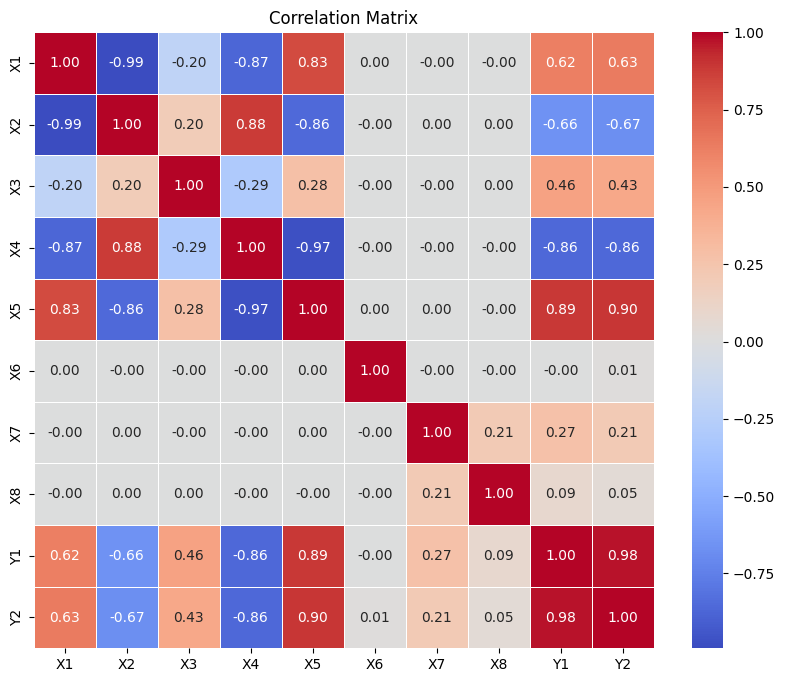

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# 3. Identify Outliers

# Use Z-score to identify outliers
from scipy.stats import zscore

# Compute Z-scores for the numerical columns
z_scores = np.abs(zscore(df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']]))

# Identify rows with Z-scores above a threshold (e.g., 3)
outliers = (z_scores > 3)

# Display outliers
print("\nOutliers (rows with Z-score > 3):")
outlier_rows = np.where(outliers)[0]  # Get the indices of outliers
print(df.iloc[outlier_rows])



Outliers (rows with Z-score > 3):
       X1     X2     X3     X4   X5   X6   X7   X8     Y1     Y2
547  0.79  637.0  343.0  147.0  7.0  5.0  0.4  1.0  41.67  46.94
595  0.79  637.0  343.0  147.0  7.0  5.0  0.4  2.0  41.92  48.03
689  0.79  637.0  343.0  147.0  7.0  3.0  0.4  4.0  41.73  47.59
738  0.79  637.0  343.0  147.0  7.0  4.0  0.4  5.0  41.09  47.01


In [ ]:
# Alternatively, use the IQR method to identify outliers
Q1 = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']].quantile(0.25)
Q3 = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Checking for values outside the bounds (outliers)
outliers_iqr = ((df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']] < lower_bound) |
                (df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']] > upper_bound))

# Display rows with outliers
outlier_rows_iqr = df[outliers_iqr.any(axis=1)]
print("\nOutliers (based on IQR method):")
print(outlier_rows_iqr)



Outliers (based on IQR method):
       X1     X2     X3      X4   X5   X6   X7   X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0  2.0  0.0  0.0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0  3.0  0.0  0.0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0  4.0  0.0  0.0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0  5.0  0.0  0.0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0  2.0  0.0  0.0  20.84  28.28
..    ...    ...    ...     ...  ...  ...  ...  ...    ...    ...
763  0.64  784.0  343.0  220.50  3.5  5.0  0.4  5.0  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5  2.0  0.4  5.0  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5  3.0  0.4  5.0  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5  4.0  0.4  5.0  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5  5.0  0.4  5.0  16.64  16.03

[768 rows x 10 columns]


(ii) Split the dataset into an 80:20 ratio for training and testing using the sklearn library.

In [ ]:
# Assuming 'df' is our DataFrame and 'Y1' is our target variable

# Separate the features (X) and target (y)
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]  # Features
y = df[['Y1', 'Y2']]  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the splits
print(f"Training set features shape: {X_train.shape}")
print(f"Testing set features shape: {X_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Testing set target shape: {y_test.shape}")


Training set features shape: (1036, 8)
Testing set features shape: (260, 8)
Training set target shape: (1036, 2)
Testing set target shape: (260, 2)


(iii) Train a multivariate linear regression model from scratch using numpy, pandas, and matplotlib. Additionally, train a linear regression model using the sklearn library on the training dataset. Also train ridge and lasso regression model using the sklearn library on the training dataset

In [ ]:
# Assuming df is your cleaned DataFrame and you have split the data
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]  # Features
y = df[['Y1', 'Y2']]  # Targets

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Multivariate Linear Regression from Scratch

# Add a column of ones to the features for the intercept term (bias)
X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_with_intercept = np.c_[np.ones(X_test.shape[0]), X_test]

# Convert target variables to numpy arrays
y_train_np = y_train.values
y_test_np = y_test.values

# Calculate coefficients using the Normal Equation
beta = np.linalg.inv(X_train_with_intercept.T.dot(X_train_with_intercept)).dot(X_train_with_intercept.T).dot(y_train_np)

# Make predictions on the training and testing sets
y_train_pred_scratch = X_train_with_intercept.dot(beta)
y_test_pred_scratch = X_test_with_intercept.dot(beta)

# Calculate training and testing RMSE
train_rmse_scratch = np.sqrt(mean_squared_error(y_train_np, y_train_pred_scratch))
test_rmse_scratch = np.sqrt(mean_squared_error(y_test_np, y_test_pred_scratch))

print("Multivariate Linear Regression (from scratch) RMSE on training data:", train_rmse_scratch)
print("Multivariate Linear Regression (from scratch) RMSE on test data:", test_rmse_scratch)


Multivariate Linear Regression (from scratch) RMSE on training data: 2.4217649008603006
Multivariate Linear Regression (from scratch) RMSE on test data: 2.272089700107086


In [ ]:
#Linear Regression using sklearn

# Train the linear regression model using scikit-learn
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

# Calculate training and testing RMSE
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))

print("Linear Regression (sklearn) RMSE on training data:", train_rmse_lr)
print("Linear Regression (sklearn) RMSE on test data:", test_rmse_lr)


Linear Regression (sklearn) RMSE on training data: 2.3874693795212125
Linear Regression (sklearn) RMSE on test data: 2.2119946721196824


In [ ]:
#Ridge Regression using sklearn

# Train the ridge regression model using scikit-learn
ridge = Ridge(alpha=1.0)  # Regularization strength (alpha)
ridge.fit(X_train, y_train)

# Predictions
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

# Calculate training and testing RMSE
train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

print("Ridge Regression RMSE on training data:", train_rmse_ridge)
print("Ridge Regression RMSE on test data:", test_rmse_ridge)


Ridge Regression RMSE on training data: 2.4396004362249797
Ridge Regression RMSE on test data: 2.281401995854127


In [ ]:
#Lasso Regression using sklearn

# Train the lasso regression model using scikit-learn
lasso = Lasso(alpha=0.1)  # Regularization strength (alpha)
lasso.fit(X_train, y_train)

# Predictions
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

# Calculate training and testing RMSE
train_rmse_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

print("Lasso Regression RMSE on training data:", train_rmse_lasso)
print("Lasso Regression RMSE on test data:", test_rmse_lasso)

Lasso Regression RMSE on training data: 2.649405262698534
Lasso Regression RMSE on test data: 2.418511636110899


(iv) Evaluate the performance for each model on the test dataset using following metrics: R2 score, Mean Squared Error (MSE) and Root Mean Squared Error(RMSE). Compare the performance of the manual model and the sklearn model and plot the predicted vs actual values for both models.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# 1. Evaluate Multivariate Linear Regression from scratch
r2_scratch = r2_score(y_test_np, y_test_pred_scratch)
mse_scratch = mean_squared_error(y_test_np, y_test_pred_scratch)
rmse_scratch = np.sqrt(mse_scratch)

print("Multivariate Linear Regression (from scratch) Performance:")
print(f"R² score: {r2_scratch}")
print(f"Mean Squared Error (MSE): {mse_scratch}")
print(f"Root Mean Squared Error (RMSE): {rmse_scratch}")


Multivariate Linear Regression (from scratch) Performance:
R² score: 0.9109795712499615
Mean Squared Error (MSE): 5.162391605332708
Root Mean Squared Error (RMSE): 2.272089700107086


In [ ]:
# 2. Evaluate Linear Regression (sklearn)
r2_lr = r2_score(y_test, y_test_pred_lr)
mse_lr = mean_squared_error(y_test, y_test_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print("\nLinear Regression (sklearn) Performance:")
print(f"R² score: {r2_lr}")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")



Linear Regression (sklearn) Performance:
R² score: 0.915610453335992
Mean Squared Error (MSE): 4.89292042948586
Root Mean Squared Error (RMSE): 2.2119946721196824


In [ ]:
# 3. Evaluate Ridge Regression (sklearn)
r2_ridge = r2_score(y_test, y_test_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("\nRidge Regression Performance:")
print(f"R² score: {r2_ridge}")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")



Ridge Regression Performance:
R² score: 0.9101934741423496
Mean Squared Error (MSE): 5.204795066687194
Root Mean Squared Error (RMSE): 2.281401995854127


In [ ]:
# 4. Evaluate Lasso Regression (sklearn)
r2_lasso = r2_score(y_test, y_test_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print("\nLasso Regression Performance:")
print(f"R² score: {r2_lasso}")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso}")



Lasso Regression Performance:
R² score: 0.8989681879092488
Mean Squared Error (MSE): 5.8491985340038175
Root Mean Squared Error (RMSE): 2.418511636110899


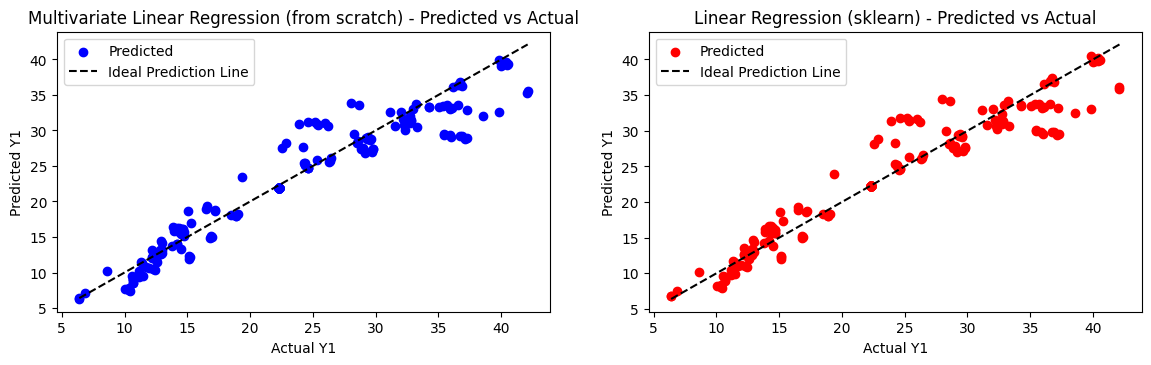

In [ ]:
# 5. Plot Predicted vs Actual values for all models

# Multivariate Linear Regression (from scratch)
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.scatter(y_test['Y1'], y_test_pred_scratch[:, 0], color='blue', label='Predicted')
plt.plot([min(y_test['Y1']), max(y_test['Y1'])], [min(y_test['Y1']), max(y_test['Y1'])], color='black', linestyle='--', label='Ideal Prediction Line')
plt.title('Multivariate Linear Regression (from scratch) - Predicted vs Actual')
plt.xlabel('Actual Y1')
plt.ylabel('Predicted Y1')
plt.legend()

# Linear Regression (sklearn)
plt.subplot(2, 2, 2)
plt.scatter(y_test['Y1'], y_test_pred_lr[:, 0], color='red', label='Predicted')
plt.plot([min(y_test['Y1']), max(y_test['Y1'])], [min(y_test['Y1']), max(y_test['Y1'])], color='black', linestyle='--', label='Ideal Prediction Line')
plt.title('Linear Regression (sklearn) - Predicted vs Actual')
plt.xlabel('Actual Y1')
plt.ylabel('Predicted Y1')
plt.legend()

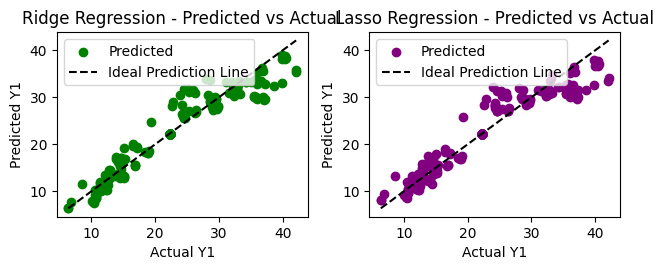

In [ ]:
# Ridge Regression (sklearn)
plt.subplot(2, 2, 3)
plt.scatter(y_test['Y1'], y_test_pred_ridge[:, 0], color='green', label='Predicted')
plt.plot([min(y_test['Y1']), max(y_test['Y1'])], [min(y_test['Y1']), max(y_test['Y1'])], color='black', linestyle='--', label='Ideal Prediction Line')
plt.title('Ridge Regression - Predicted vs Actual')
plt.xlabel('Actual Y1')
plt.ylabel('Predicted Y1')
plt.legend()

# Lasso Regression (sklearn)
plt.subplot(2, 2, 4)
plt.scatter(y_test['Y1'], y_test_pred_lasso[:, 0], color='purple', label='Predicted')
plt.plot([min(y_test['Y1']), max(y_test['Y1'])], [min(y_test['Y1']), max(y_test['Y1'])], color='black', linestyle='--', label='Ideal Prediction Line')
plt.title('Lasso Regression - Predicted vs Actual')
plt.xlabel('Actual Y1')
plt.ylabel('Predicted Y1')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Calculate R², MSE, RMSE for the manual model (from scratch)
r2_scratch = r2_score(y_test_np, y_test_pred_scratch)
mse_scratch = mean_squared_error(y_test_np, y_test_pred_scratch)
rmse_scratch = np.sqrt(mse_scratch)

# Calculate R², MSE, RMSE for the sklearn model
r2_lr = r2_score(y_test, y_test_pred_lr)
mse_lr = mean_squared_error(y_test, y_test_pred_lr)
rmse_lr = np.sqrt(mse_lr)

# Print the results for both models
print("Manual Model (from scratch) Performance:")
print(f"R² score: {r2_scratch}")
print(f"Mean Squared Error (MSE): {mse_scratch}")
print(f"Root Mean Squared Error (RMSE): {rmse_scratch}")

print("\nSklearn Model Performance:")
print(f"R² score: {r2_lr}")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")




Manual Model (from scratch) Performance:
R² score: 0.9109795712499615
Mean Squared Error (MSE): 5.162391605332708
Root Mean Squared Error (RMSE): 2.272089700107086

Sklearn Model Performance:
R² score: 0.915610453335992
Mean Squared Error (MSE): 4.89292042948586
Root Mean Squared Error (RMSE): 2.2119946721196824


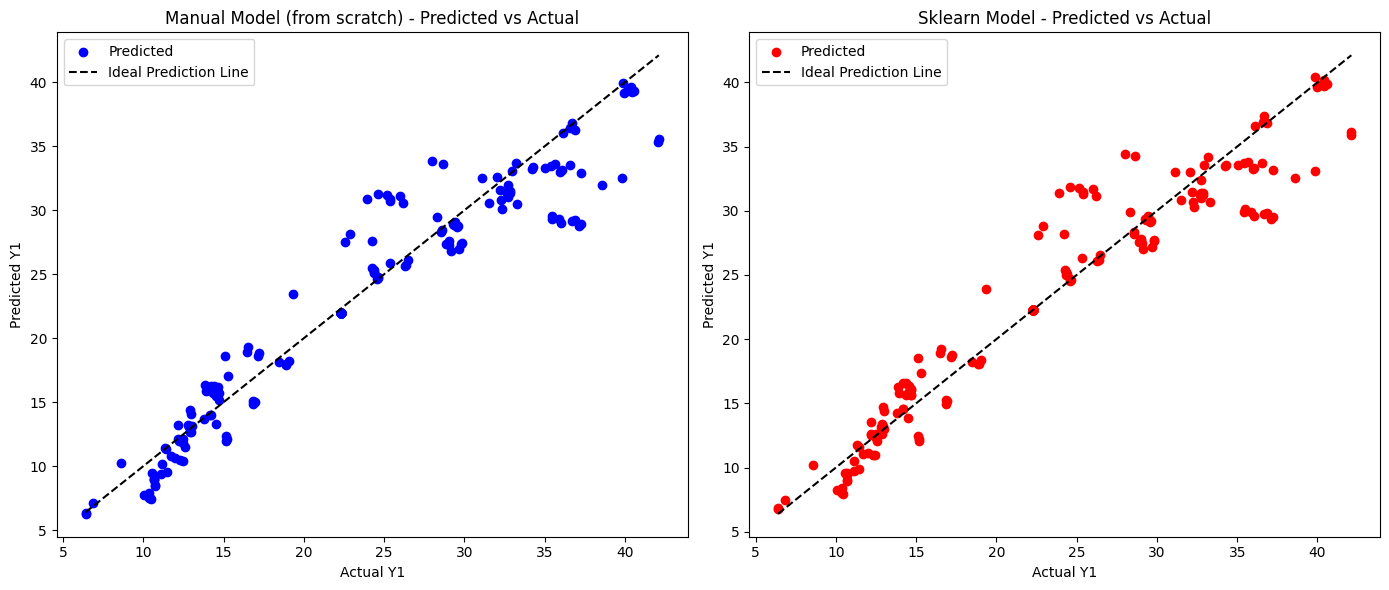

In [ ]:
# Plot Predicted vs Actual values for both models

# Create subplots for predicted vs actual values comparison
plt.figure(figsize=(14, 6))

# Manual model (from scratch)
plt.subplot(1, 2, 1)
plt.scatter(y_test['Y1'], y_test_pred_scratch[:, 0], color='blue', label='Predicted')
plt.plot([min(y_test['Y1']), max(y_test['Y1'])], [min(y_test['Y1']), max(y_test['Y1'])], color='black', linestyle='--', label='Ideal Prediction Line')
plt.title('Manual Model (from scratch) - Predicted vs Actual')
plt.xlabel('Actual Y1')
plt.ylabel('Predicted Y1')
plt.legend()

# Sklearn model
plt.subplot(1, 2, 2)
plt.scatter(y_test['Y1'], y_test_pred_lr[:, 0], color='red', label='Predicted')
plt.plot([min(y_test['Y1']), max(y_test['Y1'])], [min(y_test['Y1']), max(y_test['Y1'])], color='black', linestyle='--', label='Ideal Prediction Line')
plt.title('Sklearn Model - Predicted vs Actual')
plt.xlabel('Actual Y1')
plt.ylabel('Predicted Y1')
plt.legend()

plt.tight_layout()
plt.show()


(v) Propose energy efficiency improvement suggestions based on the insights from the model results, focusing on building design elements that most significantly impact heating load.

In [ ]:
correlation = df.corrwith(df['Y1'])
correlation


,0
X1,0.622272
X2,-0.658120
X3,0.455671
X4,-0.861828
X5,0.889431
X6,-0.002587
X7,0.269841
X8,0.087368
Y1,1.000000
Y2,0.975862


X1 (Insulation) might have a positive impact on heating load, so enhancing insulation can reduce heating demand.

X5 (Roofing/Wall Material) should be upgraded to improve thermal resistance.

X3 (Window Size/Type) should be optimized for better energy performance.